#   Movies Recommendation System

In [1]:
# Standard imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Loading the movies dataset
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [3]:
# Loading the rating dataset
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [4]:
# We will merge the movies and ratings dataset 
data = movies.merge(ratings,on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [5]:
# Shape of the dataset
data.shape

(105339, 6)

In [6]:
# Null value analysis
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [7]:
# Duplicate data analysis
data.duplicated().sum()

0

In [8]:
# dataset info()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB
None


In [9]:
# Number of users
print('The dataset has', data['userId'].nunique(), 'unique users')

# Number of movies
print('The dataset has', data['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The dataset has', data['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(data['rating'].unique()))

The dataset has 668 unique users
The dataset has 10325 unique movies
The dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


## Data Preprocessing

In [10]:
# "genres" column as pipe seprated values 
data['genres'][0]

'Adventure|Animation|Children|Comedy|Fantasy'

In [11]:
# Cleaning the "genres" column
data['genres'] = data['genres'].apply(lambda x:x.split('|'))

In [12]:
data['genres'] = data['genres'].apply(lambda x:" ".join(x))

In [13]:
# We will lower case the "genres" column values 
data['genres'] = data['genres'].apply(lambda x:x.lower())

In [14]:
# genres
data['genres'][1]

'adventure animation children comedy fantasy'

In [15]:
# Observing the dataset after cleaning
data.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),adventure animation children comedy fantasy,2,5.0,859046895
1,1,Toy Story (1995),adventure animation children comedy fantasy,5,4.0,1303501039


In [16]:
# Title 
data['title'].head()

0    Toy Story (1995)
1    Toy Story (1995)
2    Toy Story (1995)
3    Toy Story (1995)
4    Toy Story (1995)
Name: title, dtype: object

 We will remove the dates from the "title" column because the person who will look for movies in our recommendation
 will be knowing the title of the movies not the dates

In [17]:
# We will remove the date from the "title" column
data['year'] = data['title'].str.extract("(\(\d\d\d\d\))", expand = True)
data['year'] = data['year'].str.extract("(\d\d\d\d)", expand = True)
data['year'] = pd.to_numeric(data['year'], downcast = 'float' )
data['title'] = data['title'].str.replace("(\(\d\d\d\d\))", "")
data['title'] = data['title'].str.strip()

In [18]:
# Observing the dataset
data.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,adventure animation children comedy fantasy,2,5.0,859046895,1995.0
1,1,Toy Story,adventure animation children comedy fantasy,5,4.0,1303501039,1995.0
2,1,Toy Story,adventure animation children comedy fantasy,8,5.0,858610933,1995.0
3,1,Toy Story,adventure animation children comedy fantasy,11,4.0,850815810,1995.0
4,1,Toy Story,adventure animation children comedy fantasy,14,4.0,851766286,1995.0


In [19]:
# We will create a ratings dataframe with average rating and number of ratings
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Cowboys, The                                            5.0
Feast                                                   5.0
Superman/Batman: Public Enemies                         5.0
Beast of War, The (Beast, The)                          5.0
Hotel Chevalier (Part 1 of 'The Darjeeling Limited')    5.0
Name: rating, dtype: float64

In [20]:
# top 10 movies with highest number of rating
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Pulp Fiction                          325
Forrest Gump                          311
Shawshank Redemption, The             308
Jurassic Park                         294
Silence of the Lambs, The             290
Star Wars: Episode IV - A New Hope    273
Matrix, The                           261
Terminator 2: Judgment Day            253
Schindler's List                      248
Braveheart                            248
Name: rating, dtype: int64

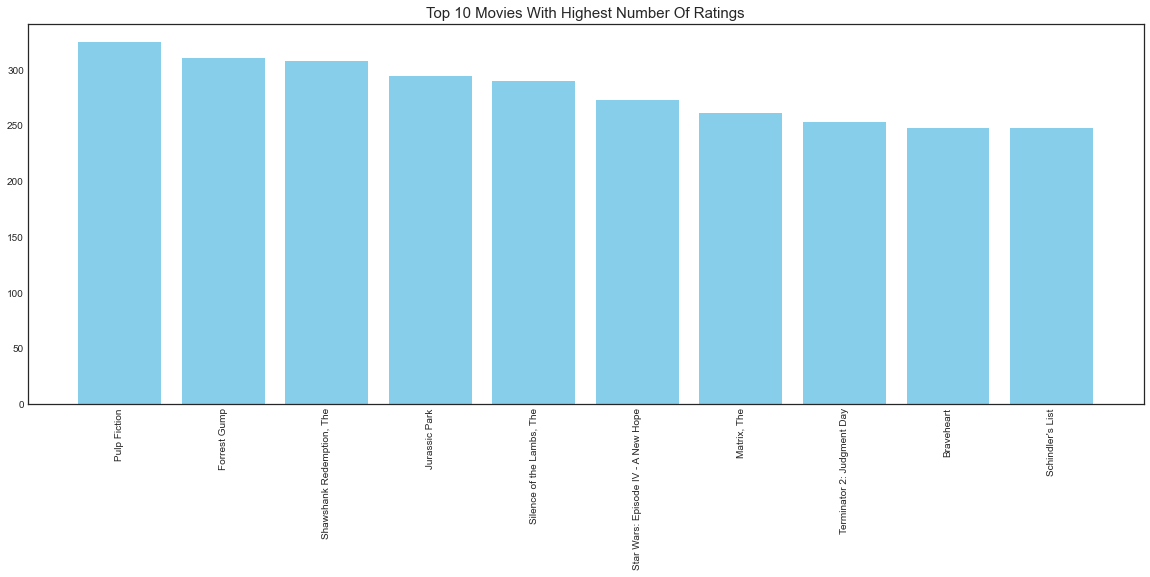

In [21]:
# Ploting the figure of top 10 movies with highest number of ratings
plt.style.use('seaborn-white')
plt.figure(figsize=(20,7))
fig = data['title'].value_counts().index[:10]
fig_values = data['title'].value_counts().values[:10]
plt.bar(fig,fig_values,color='skyblue')
plt.title('Top 10 Movies With Highest Number Of Ratings', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [22]:
# Ratings Average
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71,3.500
'Hellboy': The Seeds of Creation,3.000
'Round Midnight,2.500
'Til There Was You,4.000
"'burbs, The",3.125


In [23]:
# We will create the "num of ratings" column
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71,3.500,1
'Hellboy': The Seeds of Creation,3.000,1
'Round Midnight,2.500,1
'Til There Was You,4.000,3
"'burbs, The",3.125,20


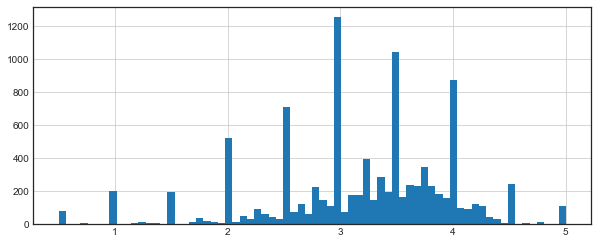

In [24]:
# Ratings histogram
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.show()

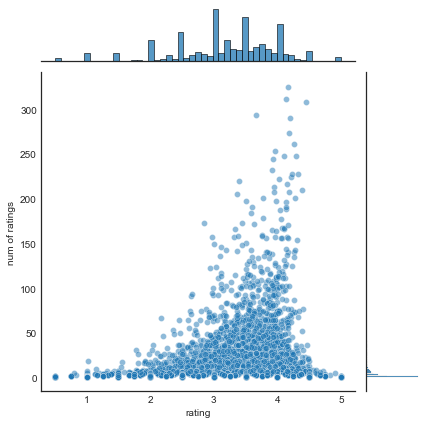

In [25]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)
plt.show()

We can see that the most of the "ratings" and "number of ratings" are following the normal distribution 

In [26]:
# We will short the dataframe
rating_data = ratings.sort_values('num of ratings',ascending=False)

In [27]:
# Top 10 movies with highest average rating and number of ratings
top_10 = rating_data[:10]
top_10

,rating,num of ratings
title,,
Pulp Fiction,4.160000,325
Forrest Gump,4.138264,311
"Shawshank Redemption, The",4.454545,308
Jurassic Park,3.659864,294
"Silence of the Lambs, The",4.194828,290
Star Wars: Episode IV - A New Hope,4.188645,273
"Matrix, The",4.264368,261
Terminator 2: Judgment Day,3.960474,253
Schindler's List,4.296371,248


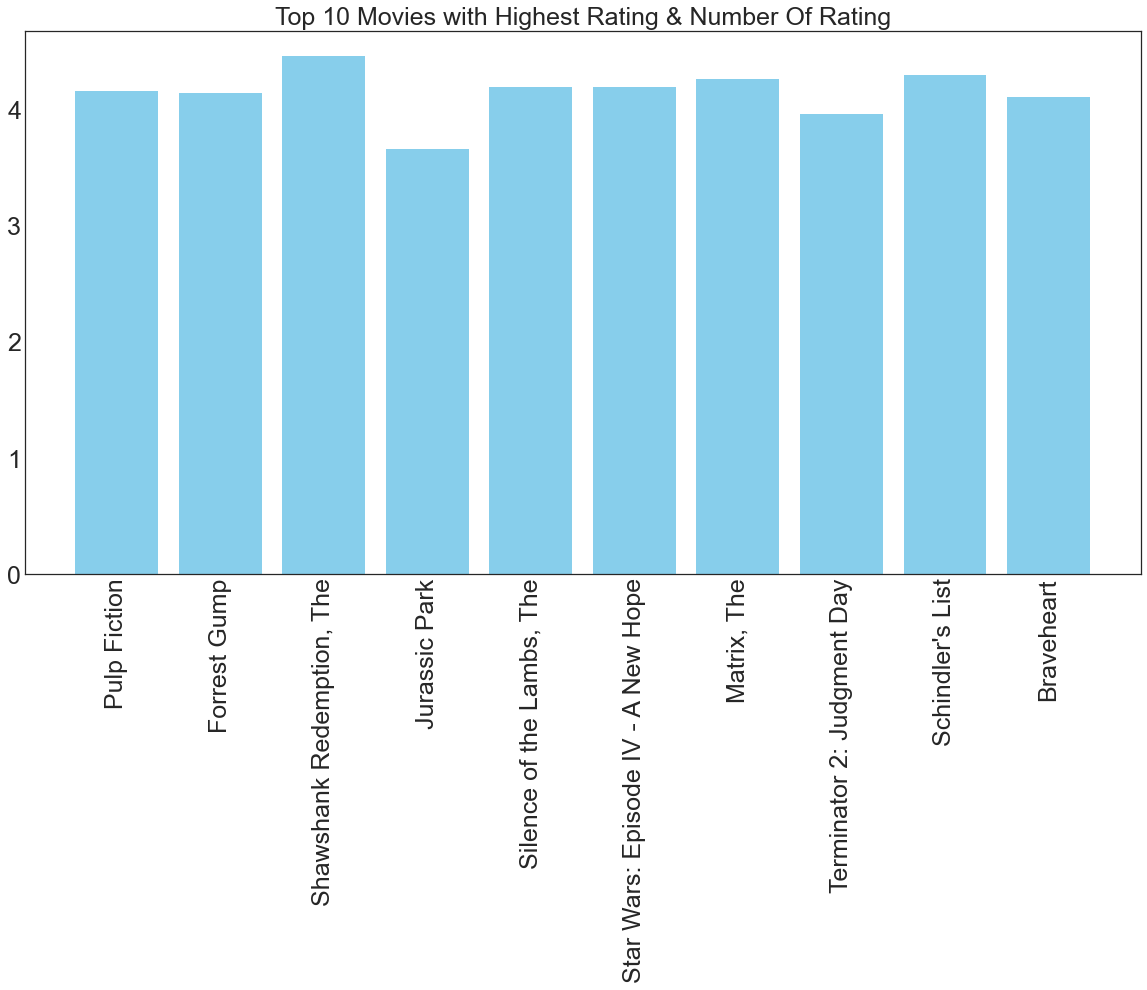

In [28]:
plt.figure(figsize=(20,10))
plt.title('Top 10 Movies with Highest Rating & Number Of Rating',fontsize=25)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.bar(top_10.index,top_10['rating'],linewidth=3,color='skyblue')
plt.show()

# Popularity-Based Recommender System 

In [29]:
# We will creat a datafrme for our recommender system
popularity_data = rating_data.reset_index()
popularity_data = popularity_data.rename(columns={'title':'title',
                                                  'rating':'Average Rating','num of ratings':'Total Number Of Ratings'})
popularity_data

,title,Average Rating,Total Number Of Ratings
0,Pulp Fiction,4.160000,325
1,Forrest Gump,4.138264,311
2,"Shawshank Redemption, The",4.454545,308
3,Jurassic Park,3.659864,294
4,"Silence of the Lambs, The",4.194828,290
...,...,...,...
10002,"Killer Is Loose, The",3.000000,1
10003,Kill the Messenger,3.000000,1
10004,Kill Me Again,4.000000,1
10005,Kika,5.000000,1


In [30]:
# We will merge the original data with the data we created for our recommender system
popularity_data = popularity_data.merge(data,on='title')
popularity_data.head()

,title,Average Rating,Total Number Of Ratings,movieId,genres,userId,rating,timestamp,year
0,Pulp Fiction,4.16,325,296,comedy crime drama thriller,1,4.0,1217896125,1994.0
1,Pulp Fiction,4.16,325,296,comedy crime drama thriller,3,5.0,841483462,1994.0
2,Pulp Fiction,4.16,325,296,comedy crime drama thriller,4,4.0,950323526,1994.0
3,Pulp Fiction,4.16,325,296,comedy crime drama thriller,7,3.5,1322062749,1994.0
4,Pulp Fiction,4.16,325,296,comedy crime drama thriller,9,5.0,842686221,1994.0


In [31]:
# We will drop all the unwanted columns from dataframe
popularity_data = popularity_data.drop(['movieId','userId','timestamp','year','rating'],axis=1)

In [32]:
# Observing the dataframe
popularity_data

,title,Average Rating,Total Number Of Ratings,genres
0,Pulp Fiction,4.16,325,comedy crime drama thriller
1,Pulp Fiction,4.16,325,comedy crime drama thriller
2,Pulp Fiction,4.16,325,comedy crime drama thriller
3,Pulp Fiction,4.16,325,comedy crime drama thriller
4,Pulp Fiction,4.16,325,comedy crime drama thriller
...,...,...,...,...
105334,"Killer Is Loose, The",3.00,1,crime drama film-noir
105335,Kill the Messenger,3.00,1,crime drama mystery thriller
105336,Kill Me Again,4.00,1,crime drama thriller
105337,Kika,5.00,1,comedy drama


In [33]:
# creating the genres list
genres = []
for genre in popularity_data.genres:
    x = genre.split()
    for i in x:
        if(i not in genres):
            genres.append(str(i))

In [34]:
# genres list
genres

['comedy',
 'crime',
 'drama',
 'thriller',
 'romance',
 'war',
 'action',
 'adventure',
 'sci-fi',
 'horror',
 'animation',
 'children',
 'fantasy',
 'mystery',
 'western',
 'imax',
 'musical',
 'film-noir',
 'documentary',
 '(no',
 'genres',
 'listed)']

In [35]:
# We will groupby the data based on genres
df = popularity_data.groupby('genres',group_keys=True).apply(lambda x: x)

In [36]:
df = df.drop('genres',axis=1)

In [37]:
df = df.reset_index()
df

,genres,level_1,title,Average Rating,Total Number Of Ratings
0,(no genres listed),102101,Round Trip to Heaven,4.0,1
1,(no genres listed),102267,The Big Broadcast of 1936,2.0,1
2,(no genres listed),102272,The 50 Year Argument,2.5,1
3,(no genres listed),102654,The Take,3.5,1
4,(no genres listed),104232,Marco Polo: One Hundred Eyes,4.0,1
...,...,...,...,...,...
105334,western,104949,Hondo,4.5,1
105335,western,104969,Hour of the Gun,2.5,1
105336,western,105068,Lawman,2.5,1
105337,western,105098,"Legend of the Lone Ranger, The",4.0,1


In [38]:
# droping the unwanted columns
df = df.drop('level_1',axis=1)
df = df.sort_values('Total Number Of Ratings',ascending=False)
df

,genres,title,Average Rating,Total Number Of Ratings
53766,comedy crime drama thriller,Pulp Fiction,4.16,325
53758,comedy crime drama thriller,Pulp Fiction,4.16,325
53778,comedy crime drama thriller,Pulp Fiction,4.16,325
53777,comedy crime drama thriller,Pulp Fiction,4.16,325
53776,comedy crime drama thriller,Pulp Fiction,4.16,325
...,...,...,...,...
86082,drama,"Time of the Wolf, The (Le temps du loup)",3.50,1
86081,drama,Together (Han ni Zai Yiki),4.00,1
86080,drama,Titanic Town,3.50,1
86079,drama,"To Have, or Not (En avoir (ou pas))",4.50,1


In [39]:
# split the "genres" column
df['genres'] = df['genres'].apply(lambda x:x.split(' '))

In [40]:
# top 20 genres
df['genres'].value_counts()[:20]

[drama]                                  7678
[comedy]                                 6676
[comedy, romance]                        3733
[drama, romance]                         3407
[comedy, drama]                          3101
[comedy, drama, romance]                 3033
[crime, drama]                           2436
[action, adventure, sci-fi]              2292
[action, adventure, thriller]            1683
[action, crime, thriller]                1657
[drama, thriller]                        1595
[action, adventure, sci-fi, thriller]    1463
[crime, drama, thriller]                 1350
[drama, war]                             1294
[action, sci-fi, thriller]               1288
[action, crime, drama, thriller]         1209
[comedy, crime]                          1181
[action, drama, war]                     1173
[documentary]                             830
[action, thriller]                        829
Name: genres, dtype: int64

In "df" dataframe we have the data in required form now will create a new dataframe for our recommender system in which columns 
will be the genres 

In [41]:
# creating the new dataframe in which the columns are genres, if the movies belongs to the same genres of that column 
# we will get the genres name else 0
for index, row in df.iterrows():
    for genres in row['genres']:
        df.at[index, genres] = genres
df = df.fillna(0)

In [42]:
# drop the old genres
df = df.drop('genres',axis=1)
df.head()

,title,Average Rating,Total Number Of Ratings,comedy,crime,drama,thriller,romance,war,action,...,children,fantasy,mystery,western,imax,musical,film-noir,documentary,(no,listed)
53766,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53758,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53778,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53777,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53776,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# data shape
df.shape

(105339, 24)

We will recommend the movies in our popular recommender system that have more than 100 reviews 

In [44]:
# we will filter the data and keep the movies that have more than 100 reviews
df = df[df['Total Number Of Ratings']>100]
df.head()

,title,Average Rating,Total Number Of Ratings,comedy,crime,drama,thriller,romance,war,action,...,children,fantasy,mystery,western,imax,musical,film-noir,documentary,(no,listed)
53766,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53758,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53778,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53777,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53776,Pulp Fiction,4.16,325,comedy,crime,drama,thriller,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Shape of the data after filtering
df.shape

(22718, 24)

In [46]:
# duplicated data
df.duplicated().sum()

22557

In [47]:
# Droping the duplicate data
df = df.drop_duplicates()

In [48]:
# Function that will recommend the popular movie
def popular_movies_recommend(genres):
    genress = df[df[genres]==genres].sort_values(['Total Number Of Ratings','Average Rating'],ascending=False).iloc[:, :3][:5]
    return genress

In [49]:
popular_movies_recommend('adventure')       # recommendation

,title,Average Rating,Total Number Of Ratings
10011,Jurassic Park,3.659864,294
7274,Star Wars: Episode IV - A New Hope,4.188645,273
32022,Toy Story,3.907328,232
7539,Star Wars: Episode V - The Empire Strikes Back,4.228070,228
327,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224


In [50]:
popular_movies_recommend('comedy')

,title,Average Rating,Total Number Of Ratings
53766,Pulp Fiction,4.160000,325
62145,Forrest Gump,4.138264,311
32022,Toy Story,3.907328,232
1557,Batman,3.397727,220
36981,Back to the Future,3.943662,213


In [51]:
popular_movies_recommend('action')

,title,Average Rating,Total Number Of Ratings
10011,Jurassic Park,3.659864,294
7274,Star Wars: Episode IV - A New Hope,4.188645,273
28715,"Matrix, The",4.264368,261
28089,Terminator 2: Judgment Day,3.960474,253
24528,Braveheart,4.108871,248


## Popular Recommender System With IpyWidgets

In [91]:
genres = widgets.Dropdown(options=['comedy','crime','drama','thriller','romance','war','action','adventure',
                                   'sci-fi','horror','animation','children','fantasy','mystery','western',
                                   'imax','musical','film-noir','documentary'],description='Genres :',disabled=False,)

button = widgets.Button(description='Recommend',disabled=False,button_style='info',tooltip='Click me',icon='film')
output = widgets.Output()
def on_recommend_click(b):
    with output:
        recommended_movie = popular_movies_recommend(genres.value)
        print(f'Recommended Movies For {genres.value} Genres:')
        #for movie in recommended_movie:
        print(recommended_movie)

button.on_click(on_recommend_click)
display(genres,button,output)

Dropdown(description='Genres :', options=('comedy', 'crime', 'drama', 'thriller', 'romance', 'war', 'action', …

Button(button_style='info', description='Recommend', icon='film', style=ButtonStyle(), tooltip='Click me')

Output()

# Content-Based Recommender System

In [53]:
# Data
data.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,adventure animation children comedy fantasy,2,5.0,859046895,1995.0
1,1,Toy Story,adventure animation children comedy fantasy,5,4.0,1303501039,1995.0
2,1,Toy Story,adventure animation children comedy fantasy,8,5.0,858610933,1995.0
3,1,Toy Story,adventure animation children comedy fantasy,11,4.0,850815810,1995.0
4,1,Toy Story,adventure animation children comedy fantasy,14,4.0,851766286,1995.0


In [54]:
# Creating the dataframe for content based recommender
content_data = data.pivot_table(index='userId',columns='title',values='rating')
content_data = content_data.fillna(0)
content_data.head()

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,10,...,[REC],[REC]²,[REC]³ 3 Génesis,a/k/a Tommy Chong,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Observing the ratings data 
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction,4.160000,325
Forrest Gump,4.138264,311
"Shawshank Redemption, The",4.454545,308
Jurassic Park,3.659864,294
"Silence of the Lambs, The",4.194828,290
Star Wars: Episode IV - A New Hope,4.188645,273
"Matrix, The",4.264368,261
Terminator 2: Judgment Day,3.960474,253
Schindler's List,4.296371,248


In [56]:
# Now let's grab the user ratings for two movies
pulp_user_ratings = content_data["Pulp Fiction"]
forest_user_ratings = content_data["Forrest Gump"]
pulp_user_ratings.head(), forest_user_ratings.head()

(userId
 1    4.0
 2    0.0
 3    5.0
 4    4.0
 5    0.0
 Name: Pulp Fiction, dtype: float64,
 userId
 1    3.0
 2    0.0
 3    3.0
 4    0.0
 5    0.0
 Name: Forrest Gump, dtype: float64)

In [57]:
# We can then use corrwith() method to get correlations between two pandas series
similar_to_pulp = content_data.corrwith(pulp_user_ratings)
similar_to_forest = content_data.corrwith(forest_user_ratings)

In [58]:
# We will clean the data by removing NaN values and using a DataFrame instead of a series
corr_pulp = pd.DataFrame(similar_to_pulp,columns=['Correlation'])
corr_pulp.dropna(inplace=True)
corr_pulp.head()

,Correlation
title,
'71,0.052955
'Hellboy': The Seeds of Creation,-0.036014
'Round Midnight,0.035161
'Til There Was You,-0.027184
"'burbs, The",0.027499


In [59]:
# Correlation
corr_pulp.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Pulp Fiction,1.000000
"Silence of the Lambs, The",0.506693
"Usual Suspects, The",0.482148
Seven (a.k.a. Se7en),0.476376
"Shawshank Redemption, The",0.453247
Reservoir Dogs,0.426330
Natural Born Killers,0.389441
Batman,0.384767
Goodfellas,0.383276


In [60]:
# We will filter out movies that have less than 100 reviews and short the dataset 
corr_pulp = corr_pulp.join(ratings['num of ratings'])
corr_pulp.head()

,Correlation,num of ratings
title,,
'71,0.052955,1
'Hellboy': The Seeds of Creation,-0.036014,1
'Round Midnight,0.035161,1
'Til There Was You,-0.027184,3
"'burbs, The",0.027499,20


In [61]:
corr_pulp[corr_pulp['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction,1.000000,325
"Silence of the Lambs, The",0.506693,290
"Usual Suspects, The",0.482148,228
Seven (a.k.a. Se7en),0.476376,196
"Shawshank Redemption, The",0.453247,308


In [62]:
# we will do same for this movie
corr_forest = pd.DataFrame(similar_to_forest,columns=['Correlation'])
corr_forest.dropna(inplace=True)
corr_forest = corr_forest.join(ratings['num of ratings'])
corr_forest[corr_forest['num of ratings']>100].sort_values('Correlation',ascending=False)[1:6]

,Correlation,num of ratings
title,,
Jurassic Park,0.517095,294
Apollo 13,0.439654,197
Speed,0.432305,197
Mrs. Doubtfire,0.430185,166
Braveheart,0.421994,248


In [63]:
# Function that will recommend the movies 
def recommend_similar_movie(movie):
    user_ratings = content_data[movie]
    similar_to_movie = content_data.corrwith(user_ratings)
    corr_ = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_.dropna(inplace=True)
    corr_ = corr_.join(ratings['num of ratings'])
    result = corr_[corr_['num of ratings']>100].sort_values('Correlation',ascending=False).iloc[:, :0][1:6]
    return result.reset_index()

In [64]:
recommend_similar_movie('Toy Story')           #recommendation

,title
0,Star Wars: Episode VI - Return of the Jedi
1,Toy Story 2
2,Star Wars: Episode IV - A New Hope
3,Willy Wonka & the Chocolate Factory
4,Independence Day (a.k.a. ID4)


In [65]:
recommend_similar_movie('Matrix, The')

,title
0,Fight Club
1,"Lord of the Rings: The Fellowship of the Ring,..."
2,American Beauty
3,Star Wars: Episode V - The Empire Strikes Back
4,Gladiator


In [66]:
recommend_similar_movie('Jurassic Park')

,title
0,Speed
1,Terminator 2: Judgment Day
2,True Lies
3,Forrest Gump
4,"Fugitive, The"


## Content-Based Recommender System With IpyWidgets

In [92]:
movie = widgets.Text(description='TITLE :')
button = widgets.Button(description='Recommend',disabled=False,button_style='info',tooltip='Click me',icon='film')
output = widgets.Output()
def on_recommend_clic(b):
    with output:
        recommended_movie = recommend_similar_movie(movie.value)
        print(f'Recommended Movies For {movie.value} Genres:')
        #for movie in recommended_movie:
        print(recommended_movie)

button.on_click(on_recommend_clic)
display(movie,button,output)

Text(value='', description='TITLE :')

Button(button_style='info', description='Recommend', icon='film', style=ButtonStyle(), tooltip='Click me')

Output()

#  Collaborative-Based Recommender System

In [68]:
# Data
data

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,adventure animation children comedy fantasy,2,5.0,859046895,1995.0
1,1,Toy Story,adventure animation children comedy fantasy,5,4.0,1303501039,1995.0
2,1,Toy Story,adventure animation children comedy fantasy,8,5.0,858610933,1995.0
3,1,Toy Story,adventure animation children comedy fantasy,11,4.0,850815810,1995.0
4,1,Toy Story,adventure animation children comedy fantasy,14,4.0,851766286,1995.0
...,...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas,comedy,475,3.0,1451213043,2015.0
105335,148626,The Big Short,drama,458,4.0,1452014749,2015.0
105336,148626,The Big Short,drama,576,4.5,1451687664,2015.0
105337,148626,The Big Short,drama,668,4.5,1451148148,2015.0


In [69]:
# Droping the unwanted columns
col_df = data.drop(['movieId','timestamp'],axis=1)
col_df.head()

,title,genres,userId,rating,year
0,Toy Story,adventure animation children comedy fantasy,2,5.0,1995.0
1,Toy Story,adventure animation children comedy fantasy,5,4.0,1995.0
2,Toy Story,adventure animation children comedy fantasy,8,5.0,1995.0
3,Toy Story,adventure animation children comedy fantasy,11,4.0,1995.0
4,Toy Story,adventure animation children comedy fantasy,14,4.0,1995.0


We will filter the dataframe 

1.We will keep the user who have rated more than 100 movies

2.Movies that have minimum 50 reviews

In [70]:
# we will keep the user who have rated more than 100 movies
x = col_df.groupby('userId').count()['rating'] > 100

In [71]:
more_than_100 = x[x].index

In [72]:
filtered_coldf = col_df[col_df['userId'].isin(more_than_100)]
filtered_coldf

,title,genres,userId,rating,year
5,Toy Story,adventure animation children comedy fantasy,17,5.0,1995.0
6,Toy Story,adventure animation children comedy fantasy,28,3.0,1995.0
7,Toy Story,adventure animation children comedy fantasy,29,4.0,1995.0
10,Toy Story,adventure animation children comedy fantasy,32,4.0,1995.0
11,Toy Story,adventure animation children comedy fantasy,38,5.0,1995.0
...,...,...,...,...,...
105334,A Very Murray Christmas,comedy,475,3.0,2015.0
105335,The Big Short,drama,458,4.0,2015.0
105336,The Big Short,drama,576,4.5,2015.0
105337,The Big Short,drama,668,4.5,2015.0


In [73]:
# we will keep the movies with move than 50 reviews
y = filtered_coldf.groupby('title').count()['rating'] > 50
famous_movies = y[y].index

In [74]:
final_coldf = filtered_coldf[filtered_coldf['title'].isin(famous_movies)]
final_coldf

,title,genres,userId,rating,year
5,Toy Story,adventure animation children comedy fantasy,17,5.0,1995.0
6,Toy Story,adventure animation children comedy fantasy,28,3.0,1995.0
7,Toy Story,adventure animation children comedy fantasy,29,4.0,1995.0
10,Toy Story,adventure animation children comedy fantasy,32,4.0,1995.0
11,Toy Story,adventure animation children comedy fantasy,38,5.0,1995.0
...,...,...,...,...,...
104132,RoboCop,action crime sci-fi imax,224,1.5,2014.0
104133,RoboCop,action crime sci-fi imax,458,3.0,2014.0
104134,RoboCop,action crime sci-fi imax,599,5.0,2014.0
104135,RoboCop,action crime sci-fi imax,642,2.5,2014.0


In [75]:
# We have the filtered data , we will transform the dataset into a matrix format
colab_data = final_coldf.pivot_table(index='userId',columns='title',values='rating')
colab_data.head()

title,2001: A Space Odyssey,28 Days Later,300,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Air Force One,Airplane!,Aladdin,Alien,...,When Harry Met Sally...,While You Were Sleeping,Who Framed Roger Rabbit?,Wild Wild West,Willy Wonka & the Chocolate Factory,Witness,"Wizard of Oz, The",X-Men,X2: X-Men United,Young Frankenstein
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
7,NaN,2.5,NaN,3.0,1.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,4.5,NaN
9,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,0.5,NaN,4.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Normalizeing the dataframe  
colab_matrix = colab_data.subtract(colab_data.mean(axis=1),axis= 'rows')
colab_matrix.head()

title,2001: A Space Odyssey,28 Days Later,300,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Air Force One,Airplane!,Aladdin,Alien,...,When Harry Met Sally...,While You Were Sleeping,Who Framed Roger Rabbit?,Wild Wild West,Willy Wonka & the Chocolate Factory,Witness,"Wizard of Oz, The",X-Men,X2: X-Men United,Young Frankenstein
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.78125,NaN,NaN,NaN,0.78125,NaN,NaN,NaN
7,NaN,-1.3,NaN,-0.8,-2.800000,NaN,NaN,NaN,NaN,1.2,...,NaN,NaN,NaN,-0.8,NaN,NaN,NaN,0.2,0.7,NaN
9,NaN,NaN,NaN,NaN,-0.964286,-0.964286,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,-3.706897,NaN,-0.206897,0.793103,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Similar Users
similar_df = colab_matrix.T.corr(method='pearson')
similar_df

userId,1,4,7,9,17,22,24,25,28,29,...,637,642,650,655,656,659,662,665,666,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000e+00,0.438645,0.191683,0.195776,-0.237488,0.105693,0.364857,0.508470,-0.081428,0.004809,...,0.187523,0.194015,0.255681,-0.082752,0.369464,0.099929,0.349334,0.034352,-8.408529e-18,0.156091
4,4.386455e-01,1.000000,-0.118798,-0.250000,-0.696088,-0.304449,-0.240523,NaN,0.000000,-0.577350,...,0.108465,NaN,0.227397,0.274774,-0.500000,-0.301511,0.114708,-0.883452,1.367952e-01,0.099846
7,1.916829e-01,-0.118798,1.000000,0.304669,0.036863,0.063659,-0.031586,0.264334,0.147114,0.417906,...,0.400892,-0.098588,0.088158,0.129925,0.347533,0.149460,-0.034773,0.009724,1.880922e-01,-0.022282
9,1.957756e-01,-0.250000,0.304669,1.000000,0.083027,0.254053,-0.153659,0.212200,0.515982,0.040071,...,-0.162650,-0.242824,0.279369,0.181369,0.544530,-0.044581,0.298660,-0.076847,5.455447e-01,0.194847
17,-2.374880e-01,-0.696088,0.036863,0.083027,1.000000,0.378118,-0.443058,-0.200000,-0.200892,0.683770,...,-0.257571,0.092099,-0.205332,0.029524,-0.336861,0.137763,-0.206725,-0.056552,7.353328e-01,-0.218557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,9.992875e-02,-0.301511,0.149460,-0.044581,0.137763,0.222247,-0.218850,0.347344,-0.007395,0.133283,...,-0.223103,0.195872,-0.076138,-0.223825,0.015393,1.000000,-0.061611,0.376487,4.986382e-01,0.052349
662,3.493335e-01,0.114708,-0.034773,0.298660,-0.206725,-0.117444,0.000000,0.323976,-0.130379,0.262123,...,-0.091670,-0.182574,0.010666,0.340735,0.034080,-0.061611,1.000000,-0.369175,-1.059148e-01,0.264690
665,3.435159e-02,-0.883452,0.009724,-0.076847,-0.056552,0.401765,-0.146857,-0.169743,-0.163749,-0.209169,...,-0.264297,0.598519,-0.083045,0.046686,0.660578,0.376487,-0.369175,1.000000,-4.293742e-01,0.263144


In [78]:
# we will create the similarity matrix for picked user
picked_userid = 1
# remove picked user id from candidate list
similar_df.drop(index=picked_userid)
# observing the data
similar_df.head()

userId,1,4,7,9,17,22,24,25,28,29,...,637,642,650,655,656,659,662,665,666,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.438645,0.191683,0.195776,-0.237488,0.105693,0.364857,0.508470,-0.081428,0.004809,...,0.187523,0.194015,0.255681,-0.082752,0.369464,0.099929,0.349334,0.034352,-8.408529e-18,0.156091
4,0.438645,1.000000,-0.118798,-0.250000,-0.696088,-0.304449,-0.240523,NaN,0.000000,-0.577350,...,0.108465,NaN,0.227397,0.274774,-0.500000,-0.301511,0.114708,-0.883452,1.367952e-01,0.099846
7,0.191683,-0.118798,1.000000,0.304669,0.036863,0.063659,-0.031586,0.264334,0.147114,0.417906,...,0.400892,-0.098588,0.088158,0.129925,0.347533,0.149460,-0.034773,0.009724,1.880922e-01,-0.022282
9,0.195776,-0.250000,0.304669,1.000000,0.083027,0.254053,-0.153659,0.212200,0.515982,0.040071,...,-0.162650,-0.242824,0.279369,0.181369,0.544530,-0.044581,0.298660,-0.076847,5.455447e-01,0.194847
17,-0.237488,-0.696088,0.036863,0.083027,1.000000,0.378118,-0.443058,-0.200000,-0.200892,0.683770,...,-0.257571,0.092099,-0.205332,0.029524,-0.336861,0.137763,-0.206725,-0.056552,7.353328e-01,-0.218557


In [79]:
# Similar user
picked_userid = 1
n = 100
# user similarity threashold
user_similarity_threshold = 0.3
# Top n similar user
similar_users = similar_df[similar_df[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
print(f'The Similar User For User {picked_userid} Are',similar_users)

The Similar User For User 1 Are userId
1      1.000000
325    0.806943
363    0.793884
193    0.668715
83     0.667225
         ...   
458    0.316635
157    0.314594
554    0.313923
560    0.312101
418    0.310237
Name: 1, Length: 100, dtype: float64


We will narrow down the item pool by doing the following:

1.Remove the movies that have been watched by the target user


2.Keep only the movies that similar users have watched.


In [80]:
# Movies that the target user has watched
picked_userid_watched = colab_matrix[colab_matrix.index == picked_userid].dropna(axis=1,how='all')
picked_userid_watched

title,American Beauty,Animal House,Apollo 13,Back to the Future,Batman,Batman Begins,"Beautiful Mind, A",Beverly Hills Cop,"Blues Brothers, The","Boot, Das (Boat, The)",...,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode VI - Return of the Jedi,Terminator 2: Judgment Day,There's Something About Mary,Titanic,True Lies,Twelve Monkeys (a.k.a. 12 Monkeys),Twister,"Untouchables, The","Usual Suspects, The"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.147059,0.647059,-0.852941,-0.852941,-1.352941,0.647059,0.147059,-0.352941,0.147059,0.647059,...,0.647059,0.647059,-0.352941,-2.352941,-2.352941,-0.852941,0.147059,-0.852941,0.647059,0.147059


To keep only the similar users' movies, we keep the user IDs in 100 similar user lists and remove the film with all missing values. All missing value for a movie means that none of the similar users have watched the movie.

In [81]:
# Movies that similar users watched. Removeing movies that none of the similar users have watched
similar_user_movies = colab_matrix[colab_matrix.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies.head()

title,2001: A Space Odyssey,28 Days Later,300,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Air Force One,Airplane!,Aladdin,Alien,...,When Harry Met Sally...,While You Were Sleeping,Who Framed Roger Rabbit?,Wild Wild West,Willy Wonka & the Chocolate Factory,Witness,"Wizard of Oz, The",X-Men,X2: X-Men United,Young Frankenstein
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.78125,NaN,NaN,NaN,0.78125,NaN,NaN,NaN
24,NaN,NaN,NaN,0.018519,NaN,NaN,NaN,NaN,NaN,-0.981481,...,NaN,NaN,NaN,-0.981481,NaN,0.018519,NaN,NaN,NaN,0.018519
25,NaN,NaN,NaN,NaN,0.788462,-1.211538,NaN,NaN,NaN,NaN,...,1.788462,0.788462,NaN,NaN,0.788462,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,-0.819820,-0.819820,-0.31982,NaN,0.18018,NaN,...,NaN,NaN,NaN,0.180180,NaN,NaN,NaN,-0.31982,-0.31982,NaN


In [82]:
# similar movies matrix
similar_user_movies

title,2001: A Space Odyssey,28 Days Later,300,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Air Force One,Airplane!,Aladdin,Alien,...,When Harry Met Sally...,While You Were Sleeping,Who Framed Roger Rabbit?,Wild Wild West,Willy Wonka & the Chocolate Factory,Witness,"Wizard of Oz, The",X-Men,X2: X-Men United,Young Frankenstein
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.781250,NaN,NaN,NaN,0.781250,NaN,NaN,NaN
24,NaN,NaN,NaN,0.018519,NaN,NaN,NaN,NaN,NaN,-0.981481,...,NaN,NaN,NaN,-0.981481,NaN,0.018519,NaN,NaN,NaN,0.018519
25,NaN,NaN,NaN,NaN,0.788462,-1.211538,NaN,NaN,NaN,NaN,...,1.788462,0.788462,NaN,NaN,0.788462,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,-0.819820,-0.819820,-0.31982,NaN,0.180180,NaN,...,NaN,NaN,NaN,0.180180,NaN,NaN,NaN,-0.319820,-0.319820,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.761745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761745,...,-0.738255,NaN,-0.738255,NaN,-0.238255,NaN,NaN,-1.238255,-0.738255,0.261745
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.174157,NaN,...,NaN,-1.674157,0.325843,NaN,-0.674157,NaN,0.325843,NaN,NaN,NaN
633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574074,...,NaN,NaN,NaN,NaN,0.574074,NaN,NaN,0.074074,NaN,-0.425926


We will drop the movies that user watched from the similar user movie list.

In [83]:
# Removeing the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# observing the data
similar_user_movies

title,2001: A Space Odyssey,28 Days Later,300,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Air Force One,Airplane!,Aladdin,Alien,...,When Harry Met Sally...,While You Were Sleeping,Who Framed Roger Rabbit?,Wild Wild West,Willy Wonka & the Chocolate Factory,Witness,"Wizard of Oz, The",X-Men,X2: X-Men United,Young Frankenstein
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.781250,NaN,NaN,NaN,0.781250,NaN,NaN,NaN
24,NaN,NaN,NaN,0.018519,NaN,NaN,NaN,NaN,NaN,-0.981481,...,NaN,NaN,NaN,-0.981481,NaN,0.018519,NaN,NaN,NaN,0.018519
25,NaN,NaN,NaN,NaN,0.788462,-1.211538,NaN,NaN,NaN,NaN,...,1.788462,0.788462,NaN,NaN,0.788462,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,-0.819820,-0.819820,-0.31982,NaN,0.180180,NaN,...,NaN,NaN,NaN,0.180180,NaN,NaN,NaN,-0.319820,-0.319820,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.761745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761745,...,-0.738255,NaN,-0.738255,NaN,-0.238255,NaN,NaN,-1.238255,-0.738255,0.261745
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.174157,NaN,...,NaN,-1.674157,0.325843,NaN,-0.674157,NaN,0.325843,NaN,NaN,NaN
633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574074,...,NaN,NaN,NaN,NaN,0.574074,NaN,NaN,0.074074,NaN,-0.425926


The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

In [84]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
57,Citizen Kane,0.281942
200,Spirited Away (Sen to Chihiro no kamikakushi),0.276302
185,Rear Window,0.273644
207,"Sting, The",0.270997
69,"Dark Knight, The",0.269551
173,One Flew Over the Cuckoo's Nest,0.266658
15,American History X,0.251665
171,North by Northwest,0.244102
221,Trainspotting,0.242974
161,Memento,0.240236


In [85]:
# Function that will recommend the movies
def collaborative_recommendation(userid):
    picked_userid = userid
    n = 100
    user_similarity_threshold = 0.3
    similar_users = similar_df[similar_df[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[1:n]
    picked_userid_watched = colab_matrix[colab_matrix.index==picked_userid].dropna(axis=1,how='all')
    similar_user_movies = colab_matrix[colab_matrix.index.isin(similar_users.index)].dropna(axis=1, how='all')
    similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
    item_score = {}
    for i in similar_user_movies.columns:
        movie_rating = similar_user_movies[i]
        total = 0
        count = 0
        for u in similar_users.index:
            if pd.isna(movie_rating[u]) == False:
                score = similar_users[u] * movie_rating[u]
                total += score
                count +=1
                item_score[i] = total / count

    item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)
    result = ranked_item_score.iloc[:, :1][:5]
    return result

In [86]:
collaborative_recommendation(userid=1)              #recommendation

,movie
57,Citizen Kane
200,Spirited Away (Sen to Chihiro no kamikakushi)
185,Rear Window
207,"Sting, The"
69,"Dark Knight, The"


In [87]:
collaborative_recommendation(userid=25)

,movie
213,"Shawshank Redemption, The"
77,"Departed, The"
116,"Godfather, The"
157,"Lord of the Rings: The Return of the King, The"
168,"Matrix, The"


In [88]:
collaborative_recommendation(userid=668)

,movie
15,Spirited Away (Sen to Chihiro no kamikakushi)
6,"Christmas Story, A"
13,Monty Python's Life of Brian
16,This Is Spinal Tap
8,Dogma


## Collaborative-Based Recommender System With IpyWidgets

In [94]:
userid = widgets.IntText(description='USER-ID:')
button = widgets.Button(description='Recommend',disabled=False,button_style='info',tooltip='Click me',icon='film')
output = widgets.Output()
def on_recommend_clicked(b):
    with output:
        recommended_movies = collaborative_recommendation(userid.value)
        print(f'Recommended Movies For {userid.value} Genres:')
        print(recommended_movies)

button.on_click(on_recommend_clicked)
display(userid,button,output)

IntText(value=0, description='USER-ID:')

Button(button_style='info', description='Recommend', icon='film', style=ButtonStyle(), tooltip='Click me')

Output()

### We Have Design The 3 D ifferent Types Of Recommendation System